In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
import graphviz
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

%matplotlib inline

In [3]:
# Learning Curve Analysis
# Taken from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

-1    4849
 1    1001
Name: cleave, dtype: int64

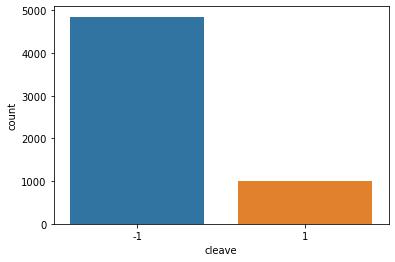

In [70]:
# Dataset source:
#http://archive.ics.uci.edu/ml/datasets/HIV-1+protease+cleavage#
# combined all datasets, removing duplicates

# Read in data
data = pd.read_csv('./data/HIV_DataSet.csv', sep=',')

sns.countplot(data['cleave']) # plot number of things with each value
# number of negative cleave values versus positive.
data['cleave'].value_counts(sort=True)
# skewed toward predicting negative because more examples?

In [73]:
# Create training, testing, and validation sets

X = data.drop('cleave', axis=1) # last value is the cleavage
y = data['cleave']
#features = X.columns.values # list of all features


x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0) # 75/25 default
print('Y_train values')
print(y_train.value_counts(sort=True))

print('Y test values')
print(y_test.value_counts(sort=True))

# labels in X data are strings, need to convert them to floats

# split training set into training and validation
#x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train) # 75/25 default

# TODO Do I need scaling?
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train) # fit and transform train
#x_test = sc.transform(x_test) # just transform the test
#x_validation = sc.transform(x_validation) # just transform the validation


Y_train values
-1    3648
 1     739
Name: cleave, dtype: int64
Y test values
-1    1201
 1     262
Name: cleave, dtype: int64


# Determining Pruning Value

In [80]:
# "When ccp_alpha is set to zero and keeping the other default parameters of 
# DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy
# and 88% testing accuracy" (scikit-learn)

# this finds the "weakest" node and prunes there. code visualizes that value.
# Code take from: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py

def test_cpp_alpha_values(x_train, y_train):
    path = dt.cost_complexity_pruning_path(x_train, y_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities

    fig, ax = plt.subplots()
    ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
    ax.set_xlabel("effective alpha")
    ax.set_ylabel("total impurity of leaves")
    ax.set_title("Total Impurity vs effective alpha for training set")
    # As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

    clfs = []
    for ccp_alpha in ccp_alphas:
        clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        clf.fit(x_train, y_train)
        clfs.append(clf)
    print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
          clfs[-1].tree_.node_count, ccp_alphas[-1]))


    clfs = clfs[:-1]
    ccp_alphas = ccp_alphas[:-1]

    node_counts = [clf.tree_.node_count for clf in clfs]
    depth = [clf.tree_.max_depth for clf in clfs]
    fig, ax = plt.subplots(2, 1)
    ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
    ax[0].set_xlabel("alpha")
    ax[0].set_ylabel("number of nodes")
    ax[0].set_title("Number of nodes vs alpha")
    ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
    ax[1].set_xlabel("alpha")
    ax[1].set_ylabel("depth of tree")
    ax[1].set_title("Depth vs alpha")
    fig.tight_layout()

    train_scores = [clf.score(x_train, y_train) for clf in clfs]
    test_scores = [clf.score(x_test, y_test) for clf in clfs]


    # the goal here is to maximize the TESTING accuracy
    fig, ax = plt.subplots()
    ax.set_xlabel("alpha")
    ax.set_ylabel("accuracy")
    ax.set_title("Accuracy vs alpha for training and testing sets")
    ax.plot(ccp_alphas, train_scores, marker='o', label="train",
            drawstyle="steps-post")
    ax.plot(ccp_alphas, test_scores, marker='o', label="test",
            drawstyle="steps-post")
    ax.legend()
    
    plt.show()
    
def test_max_depth_values(x_train, y_train):
    depths=[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
    accuracy = []
    
    for depth in depths:
        dt = DecisionTreeClassifier(random_state=0, max_depth=depth)

        # train model
        dt.fit(x_train, y_train)

        # test
        predict_dt = dt.predict(x_test)


        # how did we do? Comparing y_test and predicted values
        print("DEPTH " + str(depth))
        print(classification_report(y_test, predict_dt,zero_division=1))
        
        acc = accuracy_score(y_test, predict_dt)
        accuracy.append(acc)
        print(acc)


    fig, ax = plt.subplots()
    ax.plot(depths, accuracy)

    ax.set(xlabel='depth', ylabel='accuracy',
           title='Accuracy of n depth')
    ax.grid()

    plt.show()
    print('MAX ' + str(max(accuracy)))
    

DEPTH 2
              precision    recall  f1-score   support

          -1       0.87      0.98      0.92      1201
           1       0.79      0.35      0.48       262

    accuracy                           0.87      1463
   macro avg       0.83      0.66      0.70      1463
weighted avg       0.86      0.87      0.84      1463

0.8667122351332878
DEPTH 4
              precision    recall  f1-score   support

          -1       0.88      0.99      0.93      1201
           1       0.86      0.37      0.51       262

    accuracy                           0.88      1463
   macro avg       0.87      0.68      0.72      1463
weighted avg       0.88      0.88      0.85      1463

0.8762816131237184
DEPTH 6
              precision    recall  f1-score   support

          -1       0.88      0.99      0.93      1201
           1       0.89      0.39      0.54       262

    accuracy                           0.88      1463
   macro avg       0.89      0.69      0.74      1463
weighted avg

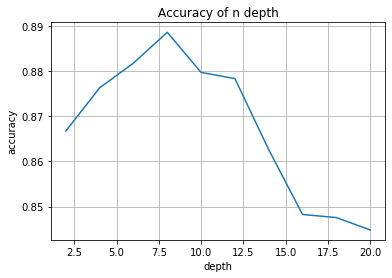

MAX 0.8885850991114149


In [81]:
test_max_depth_values(x_train, y_train)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03312883540010608


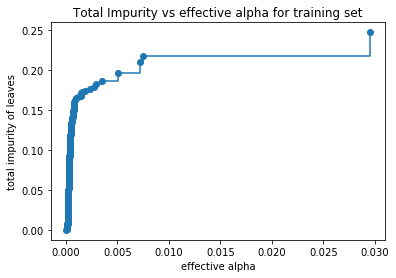

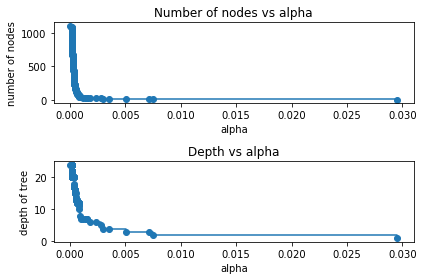

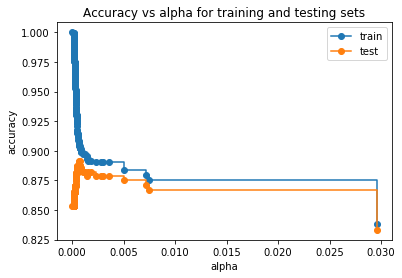

In [26]:
test_cpp_alpha_values(x_train, y_train)

# Decision Tree with Pruning

              precision    recall  f1-score   support

          -1       0.89      0.98      0.93      1201
           1       0.84      0.43      0.57       262

    accuracy                           0.88      1463
   macro avg       0.86      0.70      0.75      1463
weighted avg       0.88      0.88      0.87      1463

0.8824333561175667


"\ndot_data = tree.export_graphviz(dt, out_file=None, \n                         feature_names=features,  \n                         class_names=list(map(str, set(y))),  \n                         filled=True, rounded=True,  \n                         special_characters=True)\ngraph = graphviz.Source(dot_data)\ngraph.format = 'png'\ngraph.render('dtree_render',view=True)\n"

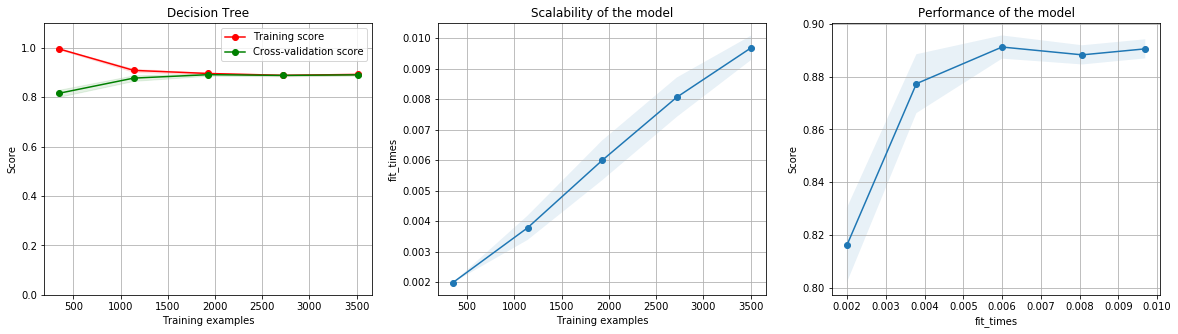

In [84]:
# Using ccp_alpha to prune the tree. Ran code above to visualize ccp_alpha value that
# best improves the accuracy of the tree
dt = DecisionTreeClassifier(random_state=0, ccp_alpha=.002)
#dt = DecisionTreeClassifier(random_state=0, max_depth=8)

# train model
dt.fit(x_train, y_train)

# analyze the tree
# alpha = 0, 1103 nodes. alpha = .002, 23 nodes
#n_nodes = dt.tree_.node_count
#print(n_nodes)

# test
predict_dt = dt.predict(x_test)


# how did we do? Comparing y_test and predicted values
print(classification_report(y_test, predict_dt,zero_division=1))

print(accuracy_score(y_test, predict_dt))

# 1.1 so I can see the top of the plot
plot_learning_curve(dt, "Decision Tree", x_train, y_train, ylim=[0,1.1])

#visualization of decision tree
'''
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=features,  
                         class_names=list(map(str, set(y))),  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('dtree_render',view=True)
'''


# Decision Tree with Pruning and Boosting

In [88]:
# reuse the same decision tree
# based on the accuracy charts above, 89% is about as high as it will go. 
# is there something off about my data?

# loop and build up a list of accuracy scores with different estimator sizes

bdt = AdaBoostClassifier(DecisionTreeClassifier(random_state=0, max_depth=8),
        n_estimators=500,
        learning_rate=1)


# train model
bdt.fit(x_train, y_train)

# test
predict_bdt = bdt.predict(x_test)


# how did we do? Comparing y_test and predicted values
print(classification_report(y_test, predict_bdt,zero_division=1))
acc = accuracy_score(y_test, predict_bdt)
print(acc)

'''
estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
accuracy = []
for est in estimators:
    bdt = AdaBoostClassifier(DecisionTreeClassifier(random_state=0, ccp_alpha=.002),
        n_estimators=est,
        learning_rate=1)


    # train model
    bdt.fit(x_train, y_train)

    # test
    predict_bdt = bdt.predict(x_test)


    # how did we do? Comparing y_test and predicted values
    print('Estimator ' + str(est))
    print(classification_report(y_test, predict_bdt,zero_division=1))
    acc = accuracy_score(y_test, predict_bdt)
    accuracy.append(acc)
    print(acc)


fig, ax = plt.subplots()
ax.plot(estimators, accuracy)

ax.set(xlabel='n estimators', ylabel='accuracy',
       title='Accuracy of n estimators')
ax.grid()

plt.show()
'''
    
    

#print('Maximum: ' + str(max(accuracy)))
    
# 1.1 so I can see the top of the plot
#plot_learning_curve(bdt, "Boosted Decision Tree", x_train, y_train, ylim=[0,1.1])

              precision    recall  f1-score   support

          -1       0.91      0.96      0.93      1201
           1       0.76      0.54      0.63       262

    accuracy                           0.89      1463
   macro avg       0.83      0.75      0.78      1463
weighted avg       0.88      0.89      0.88      1463

0.8865345181134655


"\nestimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]\naccuracy = []\nfor est in estimators:\n    bdt = AdaBoostClassifier(DecisionTreeClassifier(random_state=0, ccp_alpha=.002),\n        n_estimators=est,\n        learning_rate=1)\n\n\n    # train model\n    bdt.fit(x_train, y_train)\n\n    # test\n    predict_bdt = bdt.predict(x_test)\n\n\n    # how did we do? Comparing y_test and predicted values\n    print('Estimator ' + str(est))\n    print(classification_report(y_test, predict_bdt,zero_division=1))\n    acc = accuracy_score(y_test, predict_bdt)\n    accuracy.append(acc)\n    print(acc)\n\n\nfig, ax = plt.subplots()\nax.plot(estimators, accuracy)\n\nax.set(xlabel='n estimators', ylabel='accuracy',\n       title='Accuracy of n estimators')\nax.grid()\n\nplt.show()\n"

# KNN

              precision    recall  f1-score   support

          -1       0.89      0.95      0.92      1203
           1       0.68      0.48      0.56       260

    accuracy                           0.87      1463
   macro avg       0.79      0.71      0.74      1463
weighted avg       0.86      0.87      0.86      1463

0.8667122351332878


<module 'matplotlib.pyplot' from 'c:\\users\\spcbe\\miniconda3\\envs\\ml_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

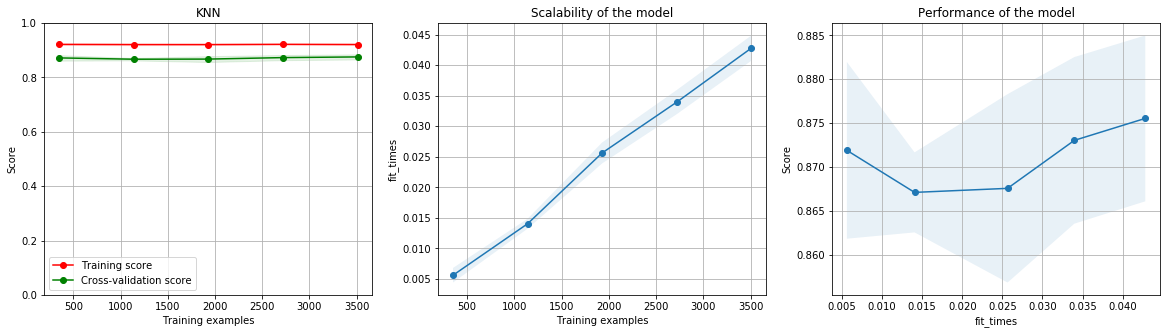

In [10]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
predict_knn = neigh.predict(x_test)


# how did we do? Comparing y_test and predicted values
print(classification_report(y_test, predict_knn,zero_division=1))

print(accuracy_score(y_test, predict_knn))

plot_learning_curve(neigh, "KNN",x_train, y_train, ylim=[0,1])

# SVM

              precision    recall  f1-score   support

          -1       0.82      1.00      0.90      1203
           1       1.00      0.00      0.00       260

    accuracy                           0.82      1463
   macro avg       0.91      0.50      0.45      1463
weighted avg       0.85      0.82      0.74      1463

0.8222829801777171


<module 'matplotlib.pyplot' from 'c:\\users\\spcbe\\miniconda3\\envs\\ml_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

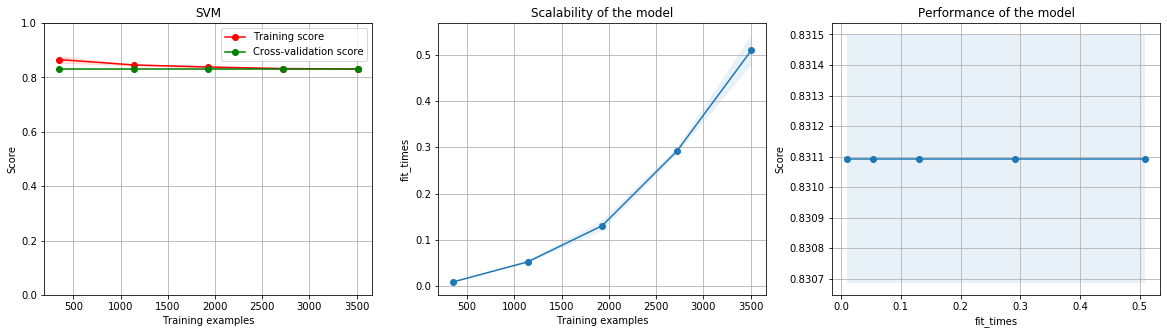

In [11]:
clf_svm = svm.SVC()
clf_svm.fit(x_train, y_train)
predict_svm = clf_svm.predict(x_test)

# how did we do? Comparing y_test and predicted values
print(classification_report(y_test, predict_svm,zero_division=1))

print(accuracy_score(y_test, predict_svm))

plot_learning_curve(clf_svm, "SVM",x_train, y_train, ylim=[0,1])

# Neural Networks

              precision    recall  f1-score   support

          -1       0.83      1.00      0.91      1203
           1       0.88      0.08      0.15       260

    accuracy                           0.84      1463
   macro avg       0.86      0.54      0.53      1463
weighted avg       0.84      0.84      0.77      1463

0.83526999316473


<module 'matplotlib.pyplot' from 'c:\\users\\spcbe\\miniconda3\\envs\\ml_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

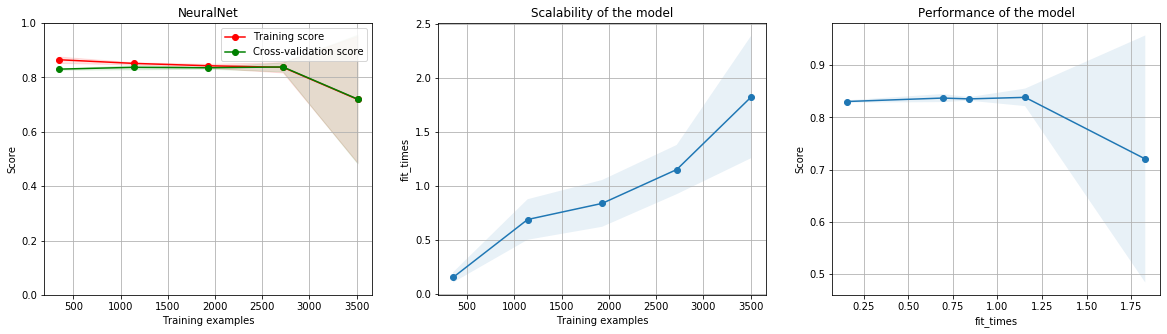

In [12]:
mlpc = MLPClassifier(max_iter=500)
mlpc.fit(x_train, y_train)
predict_mlpc = mlpc.predict(x_test)

# how did we do? Comparing y_test and predicted values
print(classification_report(y_test, predict_mlpc,zero_division=1))

print(accuracy_score(y_test, predict_mlpc))

plot_learning_curve(mlpc, "NeuralNet",x_train, y_train, ylim=[0,1])